In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [4]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
from utils.generators import gen_shapes, gen_noise, gen_image, gen_details
from utils.helpers import gen_grid_image

rnd=np.random.default_rng(31)


In [16]:
folder=["train","validate","test"] 
num_images=[10,5,2]

num_shapes=50
max_radius=1/20
min_radius=1/40

num_noise=500
max_line=1/10
min_line=1/80

im_size=1024
max_lw=0.5
min_lw=0.1
min_gray=0.7

radius = int(max_radius*im_size)+1
detail_im_size = 2*radius+1

fluct=0

In [18]:
for j in range(3):
    for i in range(num_images[j]) :
        shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
        noise = gen_noise(rnd, num_noise, max_line, min_line)
        img, sha, nse, box = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, min_gray, False)
        focus = gen_details(detail_im_size, sha, img, rnd, fluct)

        np.savez_compressed("data/"+folder[j]+"/"+folder[j]+f"{i:04d}"+".npz", image=img, shapes=sha, details=focus, boxes=box)

    plt.close()

In [19]:
pick = folder[0]+"/"+folder[0]+f"{0:04d}"

loaded  = np.load("data/"+pick+".npz")
image = loaded['image']
shapes = loaded['shapes']
details = loaded['details']
boxes = loaded['boxes']

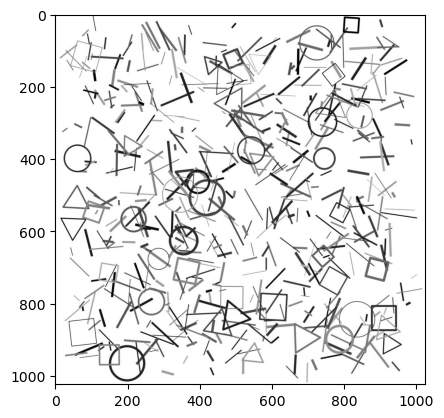

In [20]:
fig = plt.figure(figsize=(image.shape[1],image.shape[0]),dpi=1)
fig.figimage(image, cmap='gray')
fig.savefig('data/tmp_image.jpg')
plt.close()

plt.imshow(mpimg.imread('data/tmp_image.jpg'))

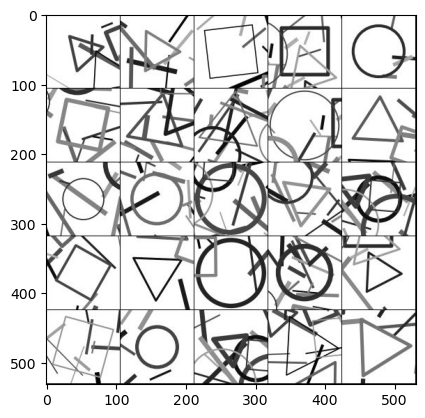

In [21]:
grid = (5,5)
grid_image, grid_pos = gen_grid_image(details, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_grid.jpg')
plt.close()

plt.imshow(mpimg.imread('data/tmp_grid.jpg'))

In [22]:
print("\nposition : shape : [pos_x, pos_y, size, rotation, line_width]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {int(shapes[i][0])} {shapes[i][1:]}")


position : shape : [pos_x, pos_y, size, rotation, line_width]
(0, 0) : 3 [433.508 884.23   29.232   0.74    0.293]
(0, 1) : 3 [208.602 658.445  32.967   0.502   0.268]
(0, 2) : 4 [ 76.8   143.032  48.879   0.902   0.108]
(0, 3) : 4 [910.423 182.438  47.325   0.786   0.364]
(0, 4) : 2 [ 62.399 624.526  36.596   0.      0.289]
(1, 0) : 4 [364.23  312.77   43.184   0.58    0.418]
(1, 1) : 3 [453.981 163.193  45.875   1.92    0.297]
(1, 2) : 3 [766.084 767.715  48.588   1.947   0.165]
(1, 3) : 2 [836.013 179.028  49.259   0.      0.134]
(1, 4) : 3 [ 59.229 508.115  41.136   2.041   0.287]
(2, 0) : 2 [286.632 346.314  29.38    0.      0.125]
(2, 1) : 2 [267.041 227.69   35.649   0.      0.337]
(2, 2) : 2 [421.189 515.56   48.041   0.      0.491]
(2, 3) : 3 [569.347 614.342  38.588   0.903   0.331]
(2, 4) : 2 [395.53  559.389  31.018   0.      0.41 ]
(3, 0) : 4 [770.699 285.784  40.618   0.271   0.26 ]
(3, 1) : 3 [ 50.286 437.523  39.973   1.009   0.206]
(3, 2) : 2 [199.507  57.299  47.289 

In [23]:
print("\nposition : [x_min, x_max, y_min, y_max]")
np.set_printoptions(precision=3, suppress=True)
for i in range(grid[0]*grid[1]):
    print(f"{grid_pos[i]} : {boxes[i]}")


position : [x_min, x_max, y_min, y_max]
(0, 0) : [413.79  462.056 856.363 905.809]
(0, 1) : [191.492 241.561 630.265 687.352]
(0, 2) : [ 38.457 115.143 104.69  181.375]
(0, 3) : [876.926 943.92  148.941 215.935]
(0, 4) : [ 25.802  98.995 587.93  661.122]
(1, 0) : [328.119 400.341 276.659 348.881]
(1, 1) : [410.876 489.131 133.713 208.374]
(1, 2) : [720.901 804.149 737.517 815.778]
(1, 3) : [786.754 885.272 129.769 228.287]
(1, 4) : [ 22.548  93.694 485.658 549.191]
(2, 0) : [257.252 316.012 316.934 375.694]
(2, 1) : [231.392 302.689 192.041 263.338]
(2, 2) : [373.148 469.23  467.519 563.601]
(2, 3) : [539.049 605.191 576.155 638.239]
(2, 4) : [364.512 426.548 528.371 590.407]
(3, 0) : [731.558 809.839 246.644 324.925]
(3, 1) : [ 16.467  85.65  397.58  458.833]
(3, 2) : [152.218 246.796  10.01  104.588]
(3, 3) : [318.193 393.842 359.045 434.694]
(3, 4) : [908.39  958.412  83.385 139.602]
(4, 0) : [ 43.604 130.762 862.578 949.737]
(4, 1) : [716.539 774.448 595.1   653.008]
(4, 2) : [334